# Working with complicated dataset

Your name:

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [114]:
### Your code here . . .
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv", skiprows=7)

df.drop(columns=df.columns[15], inplace=True)
temp = df.columns
df.columns = ["query acc.ver", "subject acc.ver", "% identity", "alignment length", "mismatches", "gap opens", "q. start", "q. end", "s. start", "s. end", "evalue", "bit score", "% positives", "bonds", "publications"]
df.loc[-1] = temp

df.drop(columns="query acc.ver", inplace=True)

temp = df["subject acc.ver"]
df.index = temp
df.index.rename("indexes", inplace=True)
df

,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
indexes,,,,,,,,,,,,,,
AGK29621.1,AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.0,"17,947",47
YP_220563.1,YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.0,"12,106",13
ACM24502.1,ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,"2,319",41
AHG32084.1,AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.0,"18,964",3
AEN03421.1,AEN03421.1,99.686,318,1,0,1,318,1,318,0,626,99.69,"12,444",39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ASP44815.1,ASP44815.1,93.375,317,21,0,1,317,1,317,0,551,96.85,"7,105",19
YP_009414156.1,YP_009414156.1,84.543,317,49,0,1,317,1,317,0,551,94.01,"18,940",37
YP_009414363.1,YP_009414363.1,85.174,317,47,0,1,317,1,317,0,551,94.01,"18,762",5


### Question 2
What is the average number of publications?

In [115]:
### Your code here . . .
df.value_counts("publications").mean()

2.1739130434782608

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [116]:
### Your code here . . .
def removeComma(x):
  newString = ""
  for i in x:
    if i != ',':
      newString = newString + i
  return newString

df["bonds"] = df["bonds"].map(removeComma)
df["bonds"] = pd.to_numeric(df["bonds"])

In [117]:
df[df["bonds"] > 15000]["subject acc.ver"]

,subject acc.ver
indexes,
AGK29621.1,AGK29621.1
AHG32084.1,AHG32084.1
6G2J_H,6G2J_H
YP_002791042.1,YP_002791042.1
AGK29634.1,AGK29634.1
0806162F,0806162F
YP_009112408.1,YP_009112408.1
YP_001876469.1,YP_001876469.1
YP_009092269.1,YP_009092269.1


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

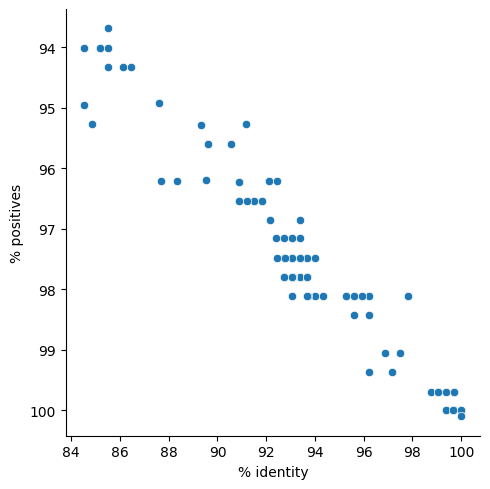

In [118]:
### Your code here . . .

sb.relplot(
    data=df,
    x="% identity",
    y="% positives")

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [119]:
### Your code here . . .
newDf = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv")
newDf.Protein

df = df.merge(newDf, left_on="subject acc.ver", right_on="Protein", how="left")
df.drop(columns=[df.columns[14], df.columns[16]], inplace=True)

,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein
0,AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.0,17947,47,NaN
1,YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.0,12106,13,YP_220563.1
2,ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41,NaN
3,AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.0,18964,3,NaN
4,AEN03421.1,99.686,318,1,0,1,318,1,318,0,626,99.69,12444,39,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ASP44815.1,93.375,317,21,0,1,317,1,317,0,551,96.85,7105,19,NaN
96,YP_009414156.1,84.543,317,49,0,1,317,1,317,0,551,94.01,18940,37,YP_009414156.1
97,YP_009414363.1,85.174,317,47,0,1,317,1,317,0,551,94.01,18762,5,YP_009414363.1
98,AGS12808.1,92.744,317,23,0,1,317,1,317,0,551,97.79,3209,32,NaN


In [127]:
df.rename(columns={"Protein":"Protein source"}, inplace=True)

def nanToNa(x):
  if pd.isna(x):
    return "NA"
  return x

df["Protein source"] = df["Protein source"].map(nanToNa)
df

,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein source
0,AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.0,17947,47,NA
1,YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.0,12106,13,YP_220563.1
2,ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41,NA
3,AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.0,18964,3,NA
4,AEN03421.1,99.686,318,1,0,1,318,1,318,0,626,99.69,12444,39,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,ASP44815.1,93.375,317,21,0,1,317,1,317,0,551,96.85,7105,19,NA
96,YP_009414156.1,84.543,317,49,0,1,317,1,317,0,551,94.01,18940,37,YP_009414156.1
97,YP_009414363.1,85.174,317,47,0,1,317,1,317,0,551,94.01,18762,5,YP_009414363.1
98,AGS12808.1,92.744,317,23,0,1,317,1,317,0,551,97.79,3209,32,NA
